# Lab 2: Построение скелета бинарного изображения

Разработать программу построения скелета бинарного изображения на основе преобразований утоньшения.

In [1]:
import matplotlib.pyplot as plt
from functions import *
%matplotlib inline

Воспользуемся той же картинкой.

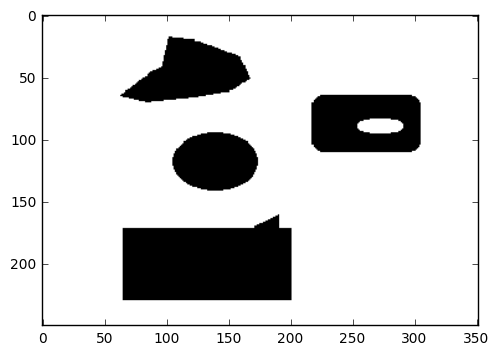

In [2]:
image = read_binary_image('data/image.png')
plt.imshow(image, cmap='Greys')

Этот алгоритм построения скелета изображения заключается в построении сходящегося итерационного процесса. Каждя итерация состоит из поочерёдного применения 8 операций утоньшения множествами (Ai, Bi) i = 0..7.

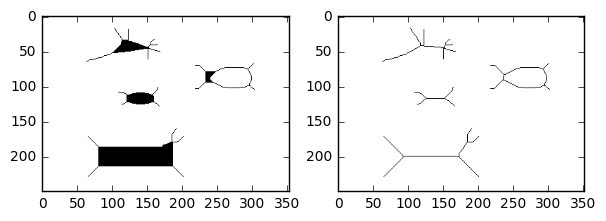

In [3]:
A = [np.array([[1, 1, 1], [0, 1, 0], [0, 0, 0]], dtype=np.bool),
     np.array([[1, 0, 0], [1, 1, 0], [1, 0, 0]], dtype=np.bool),
     np.array([[0, 0, 0], [0, 1, 0], [1, 1, 1]], dtype=np.bool),
     np.array([[0, 0, 1], [0, 1, 1], [0, 0, 1]], dtype=np.bool),
     np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0]], dtype=np.bool),
     np.array([[0, 1, 0], [1, 1, 0], [0, 0, 0]], dtype=np.bool),
     np.array([[0, 0, 0], [1, 1, 0], [0, 1, 0]], dtype=np.bool),
     np.array([[0, 0, 0], [0, 1, 1], [0, 1, 0]], dtype=np.bool)]
B = [np.array([[0, 0, 0], [0, 0, 0], [1, 1, 1]], dtype=np.bool),
     np.array([[0, 0, 1], [0, 0, 1], [0, 0, 1]], dtype=np.bool),
     np.array([[1, 1, 1], [0, 0, 0], [0, 0, 0]], dtype=np.bool),
     np.array([[1, 0, 0], [1, 0, 0], [1, 0, 0]], dtype=np.bool),
     np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0]], dtype=np.bool),
     np.array([[0, 0, 0], [0, 0, 1], [0, 1, 1]], dtype=np.bool),
     np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]], dtype=np.bool),
     np.array([[1, 1, 0], [1, 0, 0], [0, 0, 0]], dtype=np.bool)]
fig = plt.figure(figsize=(7, 10))
ax1 = fig.add_subplot(221)
skeleton = iterate(thinning, image, A, B, 15)
ax1.imshow(skeleton, cmap='Greys')
ax2 = fig.add_subplot(222)
skeleton = iterate(thinning, skeleton, A, B)
ax2.imshow(skeleton, cmap='Greys')

А этот алгоритм состоит из двух итерационных процессов. Сначала проводим утоньшение множествами (DAi, DBi), потом множествами (EAi, EBi).

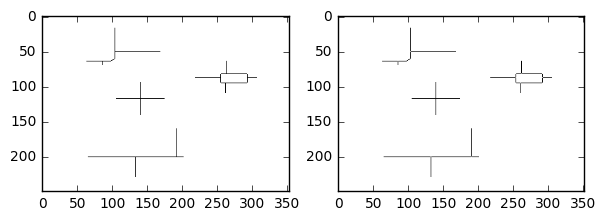

In [5]:
DA = (np.array([[0, 0, 0], [0, 1, 1], [0, 1, 0]], dtype=np.bool),
      np.array([[0, 0, 0], [1, 1, 0], [0, 1, 0]], dtype=np.bool),
      np.array([[0, 1, 0], [1, 1, 0], [0, 0, 0]], dtype=np.bool),
      np.array([[0, 1, 0], [0, 1, 1], [0, 0, 0]], dtype=np.bool))
DB = (np.array([[1, 1, 0], [1, 0, 0], [0, 0, 0]], dtype=np.bool),
      np.array([[0, 1, 1], [0, 0, 1], [0, 0, 0]], dtype=np.bool),
      np.array([[0, 0, 0], [0, 0, 1], [0, 1, 1]], dtype=np.bool),
      np.array([[0, 0, 0], [1, 0, 0], [1, 1, 0]], dtype=np.bool))
EA = (np.array([[0, 0, 0], [1, 1, 1], [0, 1, 0]], dtype=np.bool),
      np.array([[0, 1, 0], [1, 1, 0], [0, 1, 0]], dtype=np.bool),
      np.array([[0, 1, 0], [1, 1, 1], [0, 0, 0]], dtype=np.bool),
      np.array([[0, 1, 0], [0, 1, 1], [0, 1, 0]], dtype=np.bool))
EB = (np.array([[0, 1, 0], [0, 0, 0], [0, 0, 0]], dtype=np.bool),
      np.array([[0, 0, 0], [0, 0, 1], [0, 0, 0]], dtype=np.bool),
      np.array([[0, 0, 0], [0, 0, 0], [0, 1, 0]], dtype=np.bool),
      np.array([[0, 0, 0], [1, 0, 0], [0, 0, 0]], dtype=np.bool))
fig = plt.figure(figsize=(7, 10))
ax1 = fig.add_subplot(221)
skeleton = iterate(thinning, image, DA, DB)
ax1.imshow(skeleton, cmap='Greys')
ax2 = fig.add_subplot(222)
skeleton = iterate(thinning, skeleton, EA, EB)
ax2.imshow(skeleton, cmap='Greys')